# COGS 108 - Data Checkpoint

# Names

- Aditya Moghe
- Raghav Cherukuru
- Presley Cheng
- Salwan Shathar
- Eric Peng

<a id='research_question'></a>
# Research Question

What is the relationship between excerise and academic performance (i.e. Grade point average and standardized test scores) amongst undergraduate students in the United States?


# Dataset(s)

*Fill in your dataset information here*

(Dataset 1:)
- Dataset Name: FitbitsAndGradesData (Freshman)
- Variable used:  fr_DF
- Link to the dataset: https://figshare.com/articles/dataset/Dataset_Fitbits_field-tests_and_grades_The_effects_of_a_healthy_and_physically_active_lifestyle_on_the_academic_performance_of_first_year_college_students_/7218497
- Number of observations: 581 observations

Description: This dataset (strictly freshman) makes use of fitbit technology to monitor fitness levels of study particpants based on a 1-mile field assesment and a lifestyle assesment survey. The data additionaly includes Grade Point Average (GPA) measurements for each participant for the semester they were monitored in.


(Dataset 2:)
- Dataset Name: HealthBehavAcadPerfAffect 
- Variable used: hbap_DF
- Link to the dataset: https://dataverse.harvard.edu/file.xhtml?persistentId=doi:10.7910/DVN/27388/SPWIGT&version=2.0
- Number of observations:  2111

Description: This dataset (college attending students) observes the relationship between health and physical activities with academic performance. The study tracks each participant response for approximately one month in order to quanitfy change in academic performance per person.



Combining the Datasets: After revisiting both datasets, we realized that the fitness and academic performance metrics were different between the datasets. In dataset 1, the mile time and GPA is measured, whereas in dataset 2, the physical activity time (in minutes) and the passing/failing of a standardized test is measured. We may have to drop one of the datasets (most likely dataset 1) or possibly revisit our thesis in order to solidify our study.

# Setup

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt


fr_DF = pd.read_csv('https://raw.githubusercontent.com/presley-cheng/COGS108_070_DataSets/main/FitbitsAndGradesData_Fall2017.csv')

display(fr_DF.head())
display(fr_DF.shape)



,Key,Steps,Peak,Cardio,FatBurn,Mode,Minutes,Gender,Age,GPA,Life Score
0,1,11157,0.13,3.86,111.92,1,9.35,1,23,4.00,48
1,2,7986,2.72,15.53,249.29,1,8.20,1,18,3.26,101
2,3,11602,0.35,2.10,195.32,0,12.73,0,18,3.07,64
3,4,10609,1.00,6.51,121.75,1,10.00,1,17,4.00,41
4,5,14552,9.10,6.09,109.66,1,8.63,0,18,2.87,83


(581, 11)

In [33]:
hbap_DF = pd.read_csv('https://raw.githubusercontent.com/presley-cheng/COGS108_070_DataSets/main/Dataset_HealthBehavAcadPerfAffect%20-%20Dataset_HealthBehavAcadPerfAffect.csv')

display(hbap_DF.head(15))
display(hbap_DF.shape)



,ID,Day,Sex,Age,Sem,SQ,PhysAct,PA,NA,LGA,Exam,HSG,BDI
0,1,1,1,22,2,3,30,2.666667,3.666667,2,1,4.6,2
1,1,2,1,22,2,3,60,3.333333,3.000000,1,1,4.6,2
2,1,3,1,22,2,3,360,2.666667,4.000000,0,1,4.6,2
3,1,4,1,22,2,3,780,1.333333,5.000000,1,1,4.6,2
4,1,6,1,22,2,3,210,3.000000,4.666667,2,1,4.6,2
5,1,8,1,22,2,3,310,4.000000,3.666667,2,1,4.6,2
6,1,9,1,22,2,3,90,3.333333,3.333333,0,1,4.6,2
7,1,10,1,22,2,3,405,3.333333,2.666667,2,1,4.6,2
8,1,11,1,22,2,3,405,2.333333,2.666667,2,1,4.6,2
9,1,12,1,22,2,3,360,3.000000,4.000000,2,1,4.6,2


(2111, 13)

For the above dataset, the source provided a key for each variable abbrevation as follows:



In [34]:
"""
ID                     Subject number
Day                    Survey day
Sex                    Participants' sex
Age                    Participants' age
Sem                    Semester: Number of semesters studied
SQ                     Sleep quality 1 (very bad) to 4 (very good)
PhysAct                Physical activity: Number of minutes engaged in mild, moderate and strenuous exercise weighted by metabolic equivalents and then summed to produce a total daily leisure activity score
PA                     Positive affect 1 (not at all) to 7 (extremely)
NA                     Negative affect 1 (not at all) to 7 (extremely)
LGA                    Learning goal achievement 0 (not at all) to 4 (completely)
Exam                   Examination success 0 (fail) 1 (pass)
HSG                    High school grades 1 (lowest grade) to 6 (highest grade)
BDI                    Beck Depression Inventory 1(not) 2 (mild to moderate) 3 (clinically relevant symptoms)
-99                    Missing value
"""

"\nID                     Subject number\nDay                    Survey day\nSex                    Participants' sex\nAge                    Participants' age\nSem                    Semester: Number of semesters studied\nSQ                     Sleep quality 1 (very bad) to 4 (very good)\nPhysAct                Physical activity: Number of minutes engaged in mild, moderate and strenuous exercise weighted by metabolic equivalents and then summed to produce a total daily leisure activity score\nPA                     Positive affect 1 (not at all) to 7 (extremely)\nNA                     Negative affect 1 (not at all) to 7 (extremely)\nLGA                    Learning goal achievement 0 (not at all) to 4 (completely)\nExam                   Examination success 0 (fail) 1 (pass)\nHSG                    High school grades 1 (lowest grade) to 6 (highest grade)\nBDI                    Beck Depression Inventory 1(not) 2 (mild to moderate) 3 (clinically relevant symptoms)\n-99                 

# Data Cleaning

Describe your data cleaning steps here.

In [35]:
##### FitbitsAndGradesData #####
# Change gender from 0,1 -> M,F
fr_DF['Gender'] = fr_DF['Gender'].replace([0, 1], ['M', 'F'])

fr_DF.head()



,Key,Steps,Peak,Cardio,FatBurn,Mode,Minutes,Gender,Age,GPA,Life Score
0,1,11157,0.13,3.86,111.92,1,9.35,F,23,4.00,48
1,2,7986,2.72,15.53,249.29,1,8.20,F,18,3.26,101
2,3,11602,0.35,2.10,195.32,0,12.73,M,18,3.07,64
3,4,10609,1.00,6.51,121.75,1,10.00,F,17,4.00,41
4,5,14552,9.10,6.09,109.66,1,8.63,M,18,2.87,83


In [36]:
# Remove 'Mode' column -> No use towards our study 

fr_DF.drop('Mode', axis=1, inplace=True)
fr_DF.drop('Peak', axis=1, inplace=True)
display(fr_DF)

,Key,Steps,Cardio,FatBurn,Minutes,Gender,Age,GPA,Life Score
0,1,11157,3.86,111.92,9.35,F,23,4.00,48
1,2,7986,15.53,249.29,8.20,F,18,3.26,101
2,3,11602,2.10,195.32,12.73,M,18,3.07,64
3,4,10609,6.51,121.75,10.00,F,17,4.00,41
4,5,14552,6.09,109.66,8.63,M,18,2.87,83
...,...,...,...,...,...,...,...,...,...
576,577,10445,11.02,194.46,8.53,F,18,3.73,57
577,578,13537,1.54,87.39,6.55,M,18,3.93,53
578,579,7653,2.64,68.24,7.63,M,18,2.92,70
579,580,13828,8.00,189.69,8.25,F,18,3.94,73


We have thoroughly cleaned our FitbitsAndGradesData dataset for our study! 
We may need to remove 'peak' column later on.

In [37]:
##### HealthBehavAcadPerfAffect #####
# Drop SQ, LGA, HSG, and BDI column as it does not pertain to our study

hbap_DF.drop(['HSG', 'BDI', 'Day'], axis=1, inplace=True)
display(hbap_DF)

,ID,Sex,Age,Sem,SQ,PhysAct,PA,NA,LGA,Exam
0,1,1,22,2,3,30,2.666667,3.666667,2,1
1,1,1,22,2,3,60,3.333333,3.000000,1,1
2,1,1,22,2,3,360,2.666667,4.000000,0,1
3,1,1,22,2,3,780,1.333333,5.000000,1,1
4,1,1,22,2,3,210,3.000000,4.666667,2,1
...,...,...,...,...,...,...,...,...,...,...
2106,82,1,20,2,4,45,4.333333,3.666667,1,1
2107,82,1,20,2,4,825,4.333333,1.000000,4,1
2108,82,1,20,2,4,195,1.000000,6.333333,1,1
2109,82,1,20,2,4,180,1.666667,6.000000,2,1


In [38]:
# Rename columns for ease of reading
hbap_DF.rename(columns={'Sem':'Semester', 'PA':'Positive Affect',  'NA':'Negative Affect',  'Exam':'Passed Exam', 'SQ': 'Sleep Quality'}, inplace=True)
display(hbap_DF)


,ID,Sex,Age,Semester,Sleep Quality,PhysAct,Positive Affect,Negative Affect,LGA,Passed Exam
0,1,1,22,2,3,30,2.666667,3.666667,2,1
1,1,1,22,2,3,60,3.333333,3.000000,1,1
2,1,1,22,2,3,360,2.666667,4.000000,0,1
3,1,1,22,2,3,780,1.333333,5.000000,1,1
4,1,1,22,2,3,210,3.000000,4.666667,2,1
...,...,...,...,...,...,...,...,...,...,...
2106,82,1,20,2,4,45,4.333333,3.666667,1,1
2107,82,1,20,2,4,825,4.333333,1.000000,4,1
2108,82,1,20,2,4,195,1.000000,6.333333,1,1
2109,82,1,20,2,4,180,1.666667,6.000000,2,1


In [39]:
# Find null or '-99' values and remove observations 

[hbap_DF.drop(hbap_DF[hbap_DF[i] < 0].index, inplace = True) for i in hbap_DF.columns]
hbap_DF.shape

(1778, 10)

In [40]:
#Group by ID and average participant responses 
hbap_DF = hbap_DF.groupby('ID').mean()
display(hbap_DF)


,Sex,Age,Semester,Sleep Quality,PhysAct,Positive Affect,Negative Affect,LGA,Passed Exam
ID,,,,,,,,,
1,1.0,22.0,2.0,2.923077,326.923077,3.025641,3.371795,1.500000,1.0
2,1.0,21.0,2.0,3.266667,555.833333,5.744444,2.061111,2.766667,0.0
3,1.0,36.0,4.0,2.774194,381.935484,3.892473,2.956989,2.838710,1.0
4,1.0,21.0,2.0,2.612903,206.677419,2.838710,3.301075,1.387097,0.0
5,1.0,22.0,3.0,2.516129,57.258065,4.580645,3.064516,1.935484,1.0
...,...,...,...,...,...,...,...,...,...
77,1.0,20.0,2.0,3.277778,162.777778,4.185185,2.277778,2.000000,0.0
79,1.0,26.0,8.0,3.148148,61.037037,4.148148,3.000000,1.629630,0.0
80,1.0,21.0,2.0,3.866667,1005.666667,6.444444,2.733333,3.133333,0.0


In [41]:
# Change Sex column from 1,2 -> 'M','F'

hbap_DF['Sex'] = hbap_DF['Sex'].replace([1, 2], ['M', 'F'])

hbap_DF.head()

,Sex,Age,Semester,Sleep Quality,PhysAct,Positive Affect,Negative Affect,LGA,Passed Exam
ID,,,,,,,,,
1,M,22.0,2.0,2.923077,326.923077,3.025641,3.371795,1.500000,1.0
2,M,21.0,2.0,3.266667,555.833333,5.744444,2.061111,2.766667,0.0
3,M,36.0,4.0,2.774194,381.935484,3.892473,2.956989,2.838710,1.0
4,M,21.0,2.0,2.612903,206.677419,2.838710,3.301075,1.387097,0.0
5,M,22.0,3.0,2.516129,57.258065,4.580645,3.064516,1.935484,1.0


In [42]:
#Reset the index

hbap_DF = hbap_DF.reset_index()
display(hbap_DF)

,ID,Sex,Age,Semester,Sleep Quality,PhysAct,Positive Affect,Negative Affect,LGA,Passed Exam
0,1,M,22.0,2.0,2.923077,326.923077,3.025641,3.371795,1.500000,1.0
1,2,M,21.0,2.0,3.266667,555.833333,5.744444,2.061111,2.766667,0.0
2,3,M,36.0,4.0,2.774194,381.935484,3.892473,2.956989,2.838710,1.0
3,4,M,21.0,2.0,2.612903,206.677419,2.838710,3.301075,1.387097,0.0
4,5,M,22.0,3.0,2.516129,57.258065,4.580645,3.064516,1.935484,1.0
...,...,...,...,...,...,...,...,...,...,...
57,77,M,20.0,2.0,3.277778,162.777778,4.185185,2.277778,2.000000,0.0
58,79,M,26.0,8.0,3.148148,61.037037,4.148148,3.000000,1.629630,0.0
59,80,M,21.0,2.0,3.866667,1005.666667,6.444444,2.733333,3.133333,0.0
60,81,M,46.0,10.0,3.000000,262.482759,2.931034,4.626437,2.172414,1.0


In [43]:
# Change 'Passed Exam' column from 1,0 -> 'Pass','Fail' 

#hbap_DF['Passed Exam'] = hbap_DF['Passed Exam'].replace([1, 0], ['P', 'F'])

hbap_DF.head()

,ID,Sex,Age,Semester,Sleep Quality,PhysAct,Positive Affect,Negative Affect,LGA,Passed Exam
0,1,M,22.0,2.0,2.923077,326.923077,3.025641,3.371795,1.500000,1.0
1,2,M,21.0,2.0,3.266667,555.833333,5.744444,2.061111,2.766667,0.0
2,3,M,36.0,4.0,2.774194,381.935484,3.892473,2.956989,2.838710,1.0
3,4,M,21.0,2.0,2.612903,206.677419,2.838710,3.301075,1.387097,0.0
4,5,M,22.0,3.0,2.516129,57.258065,4.580645,3.064516,1.935484,1.0


We have thoroughly cleaned our HealthBehavAcadPerfAffect dataset for our study!

#Data Analysis & Results (EDA)

Carry out EDA on your dataset(s); Describe in this section

For this section we will be perfomring Data Analysis on the FitbitsAndGradesData (Freshman) dataset.

In [44]:
# determine the shape of the data

shape = fr_DF.shape
display(shape)


(581, 9)

After finding the shape of the FitbitsAndGradesData dataset, we can note that there exist:
- 581 observations
- 10 features

In [45]:
# get descriptive statistics for quantitative variables

description = fr_DF.describe()
display(description)

,Key,Steps,Cardio,FatBurn,Minutes,Age,GPA,Life Score
count,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000
mean,291.000000,10229.024096,9.007694,148.726454,10.161015,18.619621,3.186919,71.123924
std,167.864529,3067.141829,16.465780,96.495032,3.139881,1.673802,0.757748,18.553700
min,1.000000,0.000000,0.000000,0.000000,5.380000,16.000000,0.000000,35.000000
25%,146.000000,8506.000000,2.340000,82.430000,7.670000,18.000000,2.840000,58.000000
50%,291.000000,10284.000000,4.600000,122.000000,9.350000,18.000000,3.350000,69.000000
75%,436.000000,12082.000000,8.950000,189.690000,12.150000,19.000000,3.780000,83.000000
max,581.000000,20331.000000,180.650000,729.670000,21.070000,40.000000,4.000000,130.000000


After analyzing the descriptive statistics for FitbitsAndGradesData dataset we noted the following:
- Mean GPA = 3.187
- Mean Life Score = 71.123
- Median GPA = 3.35
- Median Life Score = 69

In [46]:
# take a look at how sex is broken down

gender_counts = fr_DF['Gender'].value_counts()
display(gender_counts)

F    344
M    237
Name: Gender, dtype: int64

Here we see the distribution of Gender over our sample dataset. We notice that our sample is 0.68 males for each female. Generally we notice that the ratio in an average US college college is 0.66 males for each female (40% male to 60% female). Therefore we can conclude that our sample is representative our over population in study.

In [47]:
# lets look at how gender breaks down our statistics

description_male = fr_DF.loc[fr_DF['Gender'] == 'M'].describe()
description_female = fr_DF.loc[fr_DF['Gender'] == 'F'].describe()

display("Male Statistics")
display(description_male)

display("Female Statistics")
display(description_female)

'Male Statistics'

,Key,Steps,Cardio,FatBurn,Minutes,Age,GPA,Life Score
count,237.000000,237.000000,237.00000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,282.527426,10424.932489,8.30827,122.155738,8.585907,18.852321,3.054304,69.978903
std,166.649651,3370.917550,15.68713,75.110210,2.877209,2.312302,0.720178,18.331331
min,3.000000,9.000000,0.00000,0.010000,5.380000,16.000000,0.600000,35.000000
25%,138.000000,8399.000000,1.83000,69.840000,6.850000,18.000000,2.680000,56.000000
50%,282.000000,10455.000000,3.34000,104.090000,7.630000,18.000000,3.210000,68.000000
75%,425.000000,12497.000000,6.57000,169.650000,9.120000,19.000000,3.620000,83.000000
max,581.000000,20331.000000,134.20000,439.580000,21.070000,40.000000,4.000000,124.000000


'Female Statistics'

,Key,Steps,Cardio,FatBurn,Minutes,Age,GPA,Life Score
count,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000
mean,296.837209,10094.052326,9.489564,167.032442,11.246192,18.459302,3.278285,71.912791
std,168.690540,2836.259017,16.987269,105.068967,2.842495,0.997709,0.770413,18.691089
min,1.000000,0.000000,0.000000,0.000000,5.580000,16.000000,0.000000,35.000000
25%,156.750000,8770.750000,3.097500,98.270000,8.910000,18.000000,2.920000,58.000000
50%,305.500000,10187.000000,5.780000,136.620000,10.795000,18.000000,3.500000,70.000000
75%,444.250000,11790.000000,9.852500,214.147500,13.205000,19.000000,3.820000,83.000000
max,580.000000,18673.000000,180.650000,729.670000,19.100000,25.000000,4.000000,130.000000


After analyzing the breakdown of statistics by gender, we found that the mean and median GPA amongst females was higher than the mean and median GPA's of males. This holds true for the Life Score broken down by gender as well.

In [48]:
# log transform with a 0.1 offset

fr_DF['Cardio_log10'] = np.log10(fr_DF['Cardio']+ 0.1)

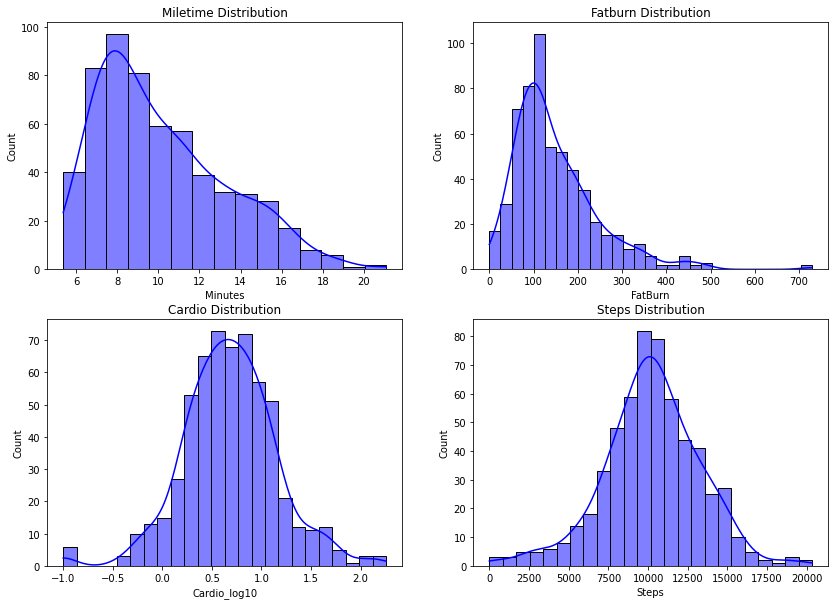

In [49]:

fig, axs = plt.subplots(2,2, figsize=(14, 10))

minutes_histplot = sns.histplot(data=fr_DF, x="Minutes", kde=True, color="blue", ax = axs[0][0]).set_title('Miletime Distribution')
fatburn_histplot = sns.histplot(data=fr_DF, x="FatBurn", kde=True, color="blue", ax = axs[0][1]).set_title('Fatburn Distribution')
cardio_histplot = sns.histplot(data=fr_DF, x="Cardio_log10", kde=True, color="blue", ax = axs[1][0]).set_title('Cardio Distribution')
steps_histplot = sns.histplot(data=fr_DF, x="Steps", kde=True, color="blue", ax = axs[1][1]).set_title('Steps Distribution')

plt.show()

The miletime distribution and average miletime of 10 minutes shown above in our data statistics are consistent with each other, because the distribution is skewed to the right, therefore a slight adjustments in the average is expected. We can also see that the Cardio, Steps, and Fatburn appear to be normally distributed or near normally distributed if outliers were not an influencing factor.

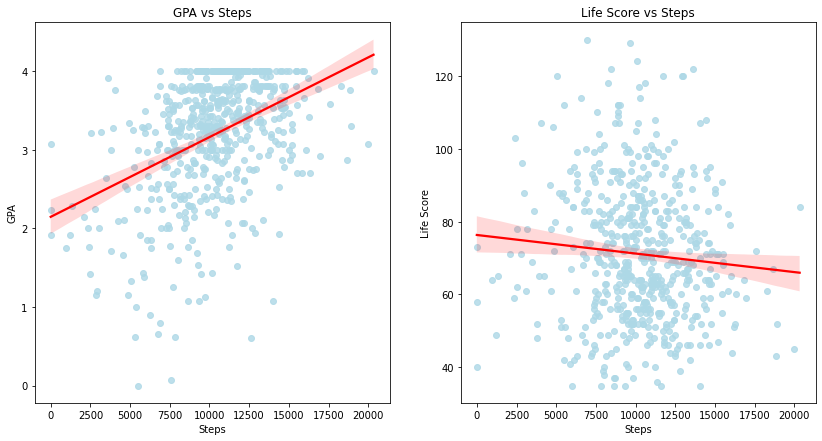

In [50]:
# the effect of Steps on GPA and Life Score

fig, axs = plt.subplots(1,2, figsize=(14, 7))

steps_gpa = sns.regplot(data = fr_DF, x = 'Steps', y = 'GPA', scatter_kws={"color": "lightblue"}, line_kws={"color": "red"}, ax=axs[0],).set_title('GPA vs Steps')
steps_lifescore = sns.regplot(data = fr_DF, x = 'Steps', y = 'Life Score', scatter_kws={"color": "lightblue"}, line_kws={"color": "red"}, ax=axs[1]).set_title('Life Score vs Steps')

plt.show()


After looking at these graphs we find a slightly positive correlation between the GPA and the steps. This means that more steps would result in higher GPA. On the other hand, it is hard to see a relationship between lifescore and steps.

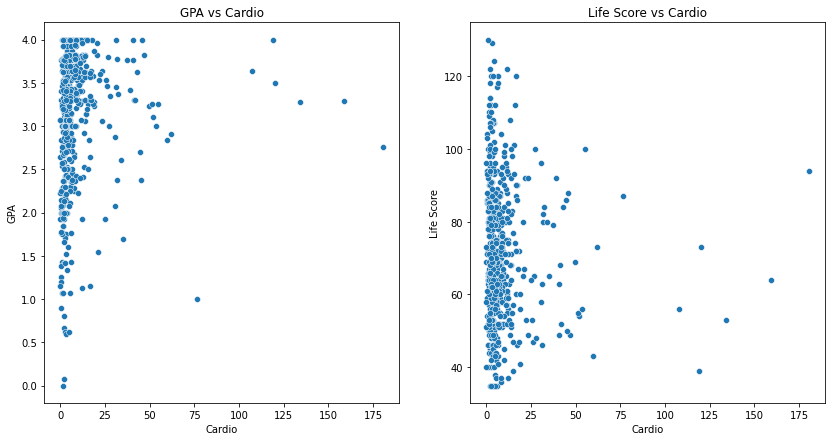

In [51]:
# the effect of Cardio on GPA and Life Score

fig, axs = plt.subplots(1,2, figsize=(14, 7))

cardio_gpa = sns.scatterplot(data = fr_DF, x = 'Cardio', y = 'GPA', ax=axs[0],).set_title('GPA vs Cardio')
cardio_lifescore = sns.scatterplot(data = fr_DF, x = 'Cardio', y = 'Life Score', ax=axs[1]).set_title('Life Score vs Cardio')

plt.show()


From the above visualization, we can see that there appears to be some general positive relationship, but we noticed some outliers that skew the data to the right. Overall, we can see that the data for both Life Score and GPA cluster around 0. This suggests that we need to transform our data using linear regression to ensure that the large outlier values are not driving our relationship. We will apply a log10-transformation to the two visualizations above with an offset of 0.1.  This will shift the values away from being centered near zero when put on the log scale



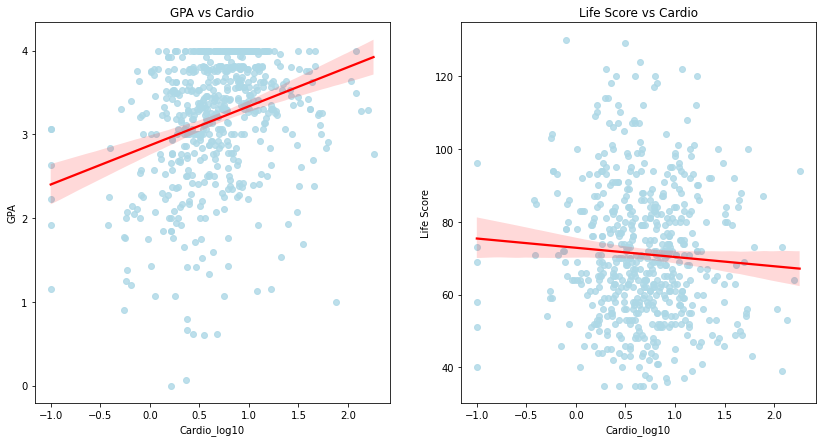

In [52]:
# the effect of Cardio_log10 on GPA and Life Score

fig, axs = plt.subplots(1,2, figsize=(14, 7))

cardiolog_gpa = sns.regplot(data = fr_DF, x = 'Cardio_log10', y = 'GPA',scatter_kws={"color": "lightblue"}, line_kws={"color": "red"}, ax=axs[0],).set_title('GPA vs Cardio')
cardiolog_lifescore = sns.regplot(data = fr_DF, x = 'Cardio_log10', y = 'Life Score',scatter_kws={"color": "lightblue"}, line_kws={"color": "red"}, ax=axs[1]).set_title('Life Score vs Cardio')

plt.show()

After looking at the graph, we can see a positive correlation between GPA and Cardio. This means more cardio will result in a slightly higher GPA. In terms of life score and cardio, it is harder to see a strong relationship between the two variables.

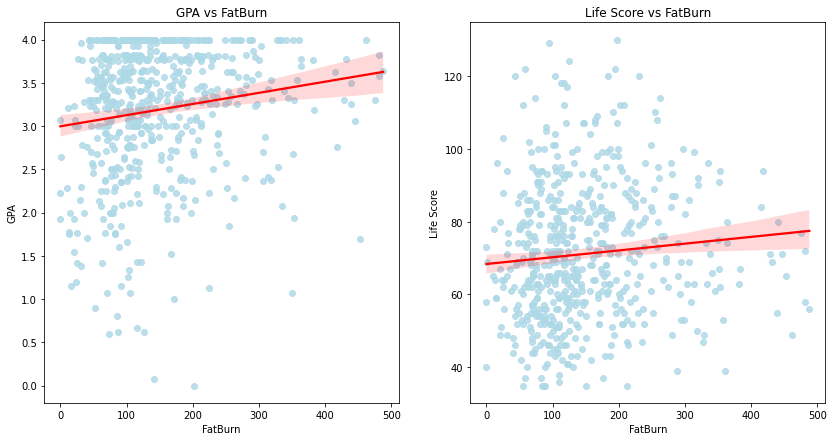

In [53]:
# the effect of FatBurn on GPA and Life Score (excluding outliers)

fig, axs = plt.subplots(1,2, figsize=(14, 7))

fatburn_gpa = sns.regplot(data = fr_DF.loc[fr_DF['FatBurn'] < 600], x = 'FatBurn', y = 'GPA', scatter_kws={"color": "lightblue"}, line_kws={"color": "red"}, ax=axs[0],).set_title('GPA vs FatBurn')
fatburn_lifescore = sns.regplot(data = fr_DF.loc[fr_DF['FatBurn'] < 600], x = 'FatBurn', y = 'Life Score', scatter_kws={"color": "lightblue"}, line_kws={"color": "red"}, ax=axs[1]).set_title('Life Score vs FatBurn')

plt.show()


After analyzing the above visualizations, we see a slight positive correlation between GPA and Fat burn after we excluded extreme outliers. On the other hand, we see that there exists little to no correlation between life score and Fat burn. This entails that more fat burned suggests a higher GPA for the student.

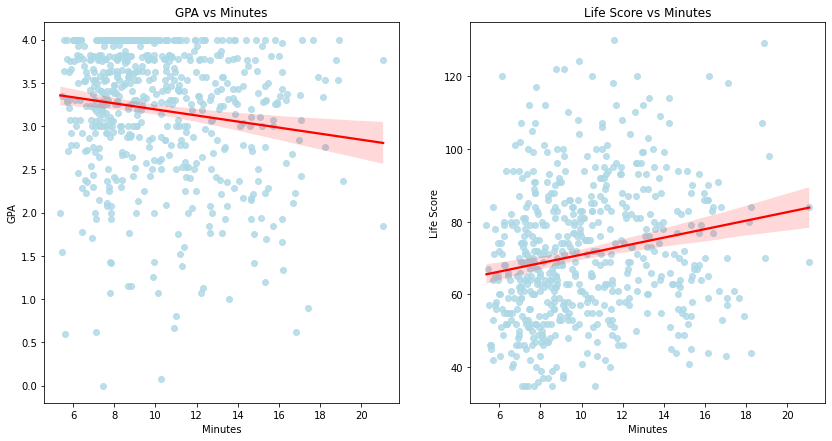

In [54]:
# the effect of Mile time on GPA and Life Score

fig, axs = plt.subplots(1,2, figsize=(14, 7))

minutes_gpa = sns.regplot(data = fr_DF, x = 'Minutes', y = 'GPA', scatter_kws={"color": "lightblue"}, line_kws={"color": "red"}, ax=axs[0],).set_title('GPA vs Minutes')
minutes_lifescore = sns.regplot(data = fr_DF, x = 'Minutes', y = 'Life Score', scatter_kws={"color": "lightblue"}, line_kws={"color": "red"}, ax=axs[1]).set_title('Life Score vs Minutes')

plt.show()

By looking at the correlation between GPA and Miletime (in minutes) for our entire population in the scatterplot, we have identified people who spent less time walking a mile or may be more physically fit have slightly better GPA, this implies that physicality may have an impact on academic performance. As for Life Score in response to Miletime, there is a slight positive correlation between minutes and life score, where the less minutes result in lower life score.

In [55]:
males_DF = fr_DF.loc[fr_DF['Gender'] == 'M'] 
females_DF = fr_DF.loc[fr_DF['Gender'] == 'F']

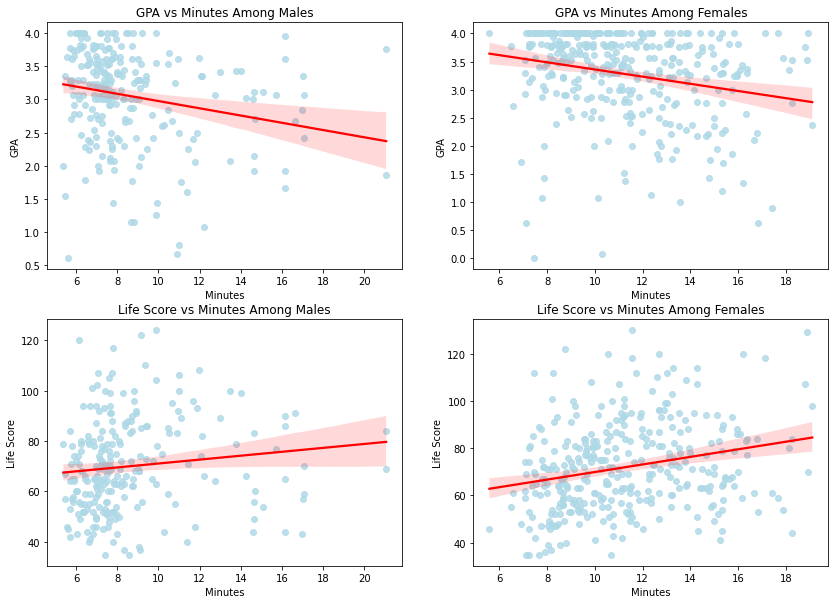

In [56]:
# lets look at the effect of mile time on GPA and lifescore, broken down by gender

fig, axs = plt.subplots(2,2, figsize=(14, 10))

minutes_male_gpa = sns.regplot(data=males_DF, x="Minutes",  y = 'GPA', scatter_kws={"color": "lightblue"}, line_kws={"color": "red"}, ax=axs[0][0],).set_title('GPA vs Minutes Among Males')
minutes_female_gpa = sns.regplot(data=females_DF, x="Minutes",  y = 'GPA', scatter_kws={"color": "lightblue"}, line_kws={"color": "red"}, ax=axs[0][1],).set_title('GPA vs Minutes Among Females')
minutes_male_lifescore = sns.regplot(data=males_DF, x="Minutes", y = 'Life Score', scatter_kws={"color": "lightblue"}, line_kws={"color": "red"}, ax=axs[1][0]).set_title('Life Score vs Minutes Among Males')
minutes_female_lifescore = sns.regplot(data=females_DF, x="Minutes", y = 'Life Score', scatter_kws={"color": "lightblue"}, line_kws={"color": "red"}, ax=axs[1][1]).set_title('Life Score vs Minutes Among Females')

plt.show()

After looking at these scatterplots we can analyze that for females, we see a slight trend of the faster miletime correlates to a higher GPA and lower lifescore. On the otherhand, it is harder to see a relationship between GPA and minutes, and lifescore and minutes among males when ignoring outliers.

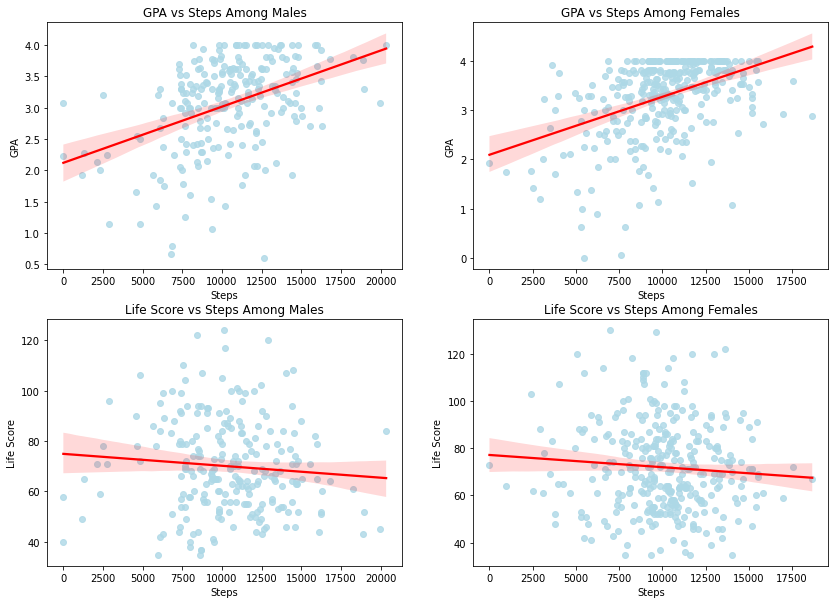

In [57]:
# lets look at the effect of steps taken on GPA and lifescore, broken down by gender

fig, axs = plt.subplots(2,2, figsize=(14, 10))

steps_male_gpa = sns.regplot(data=males_DF, x="Steps",  y = 'GPA', scatter_kws={"color": "lightblue"}, line_kws={"color": "red"}, ax=axs[0][0],).set_title('GPA vs Steps Among Males')
steps_female_gpa = sns.regplot(data=females_DF, x="Steps",  y = 'GPA', scatter_kws={"color": "lightblue"}, line_kws={"color": "red"}, ax=axs[0][1],).set_title('GPA vs Steps Among Females')
steps_male_lifescore = sns.regplot(data=males_DF, x="Steps", y = 'Life Score', scatter_kws={"color": "lightblue"}, line_kws={"color": "red"}, ax=axs[1][0]).set_title('Life Score vs Steps Among Males')
steps_female_lifescore = sns.regplot(data=females_DF, x="Steps", y = 'Life Score', scatter_kws={"color": "lightblue"}, line_kws={"color": "red"}, ax=axs[1][1]).set_title('Life Score vs Steps Among Females')

plt.show()

After looking at these graphs we can idenitfy there is a strong positive correlation between the GPA and steps among both males and females. However, there is a weaker correlation between lifescore and steps among both genders. 

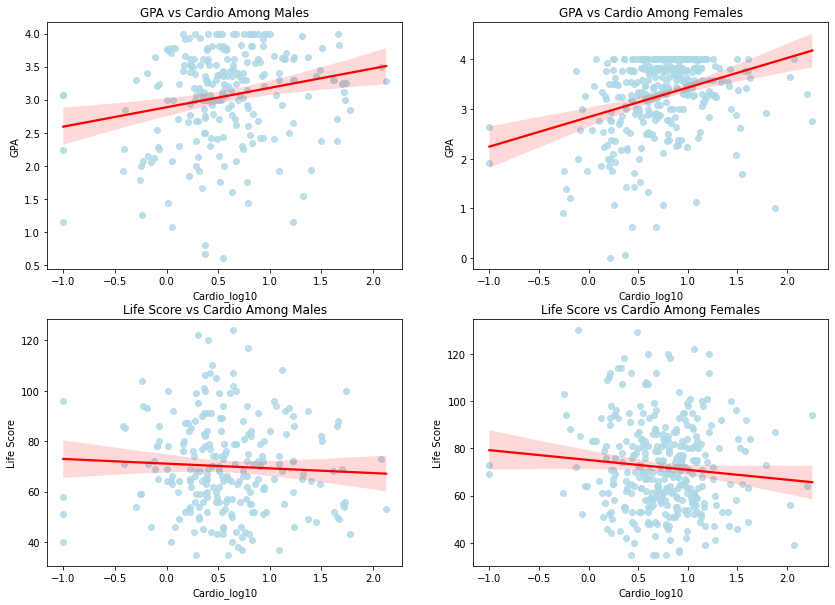

In [58]:
# lets look at the effect of Cardio on GPA and lifescore, broken down by gender

fig, axs = plt.subplots(2,2, figsize=(14, 10))

cardio_male_gpa = sns.regplot(data=males_DF, x="Cardio_log10",  y = 'GPA', scatter_kws={"color": "lightblue"}, line_kws={"color": "red"}, ax=axs[0][0],).set_title('GPA vs Cardio Among Males')
cardio_female_gpa = sns.regplot(data=females_DF, x="Cardio_log10",  y = 'GPA', scatter_kws={"color": "lightblue"}, line_kws={"color": "red"}, ax=axs[0][1],).set_title('GPA vs Cardio Among Females')
cardio_male_lifescore = sns.regplot(data=males_DF, x="Cardio_log10", y = 'Life Score', scatter_kws={"color": "lightblue"}, line_kws={"color": "red"}, ax=axs[1][0]).set_title('Life Score vs Cardio Among Males')
cardio_female_lifescore = sns.regplot(data=females_DF, x="Cardio_log10", y = 'Life Score', scatter_kws={"color": "lightblue"}, line_kws={"color": "red"}, ax=axs[1][1]).set_title('Life Score vs Cardio Among Females')

plt.show()

There is no difference in trends for both lifescore vs cardio and GPA vs cardio between both the genders.

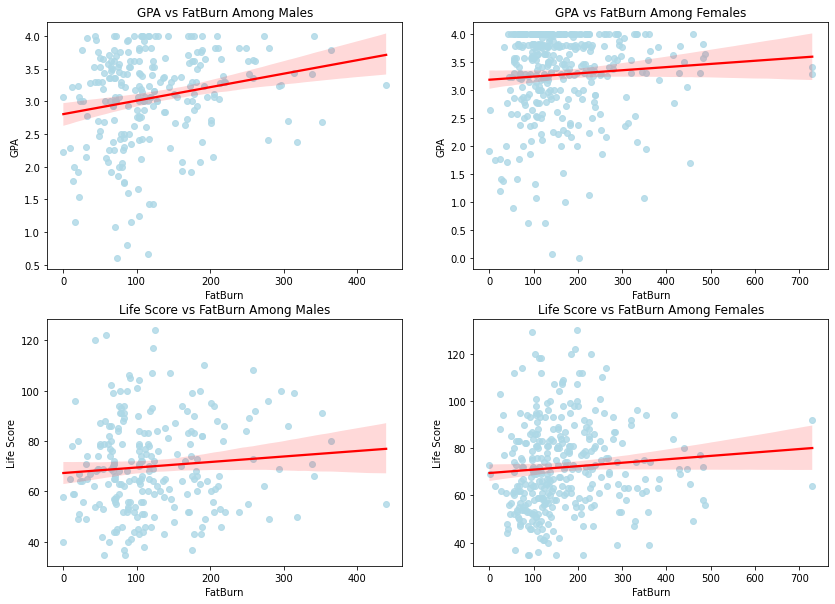

In [59]:
# lets look at the effect of Fat Burn on GPA and lifescore, broken down by gender

fig, axs = plt.subplots(2,2, figsize=(14, 10))

fatburn_male_gpa = sns.regplot(data=males_DF, x="FatBurn",  y = 'GPA', scatter_kws={"color": "lightblue"}, line_kws={"color": "red"}, ax=axs[0][0],).set_title('GPA vs FatBurn Among Males')
fatburn_female_gpa = sns.regplot(data=females_DF, x="FatBurn",  y = 'GPA', scatter_kws={"color": "lightblue"}, line_kws={"color": "red"}, ax=axs[0][1],).set_title('GPA vs FatBurn Among Females')
fatburn_male_lifescore = sns.regplot(data=males_DF, x="FatBurn", y = 'Life Score', scatter_kws={"color": "lightblue"}, line_kws={"color": "red"}, ax=axs[1][0]).set_title('Life Score vs FatBurn Among Males')
fatburn_female_lifescore = sns.regplot(data=females_DF, x="FatBurn", y = 'Life Score', scatter_kws={"color": "lightblue"}, line_kws={"color": "red"}, ax=axs[1][1]).set_title('Life Score vs FatBurn Among Females')

plt.show()

There is no difference in trends for both lifescore vs fatburn and GPA vs fatburn between both the genders.